<a href="https://colab.research.google.com/github/RENJITHVS/CNN/blob/main/Cats_vs_Dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:48<00:00, 24.0MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.3MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout 

In [ ]:
# generators

# divides dataset into batches, maintly used to porcess large amount of data

train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    # shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    # interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # **kwargs
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,epochs=10, validation_data=validation_dataset)

Epoch 1/10
625/625 [==============================] - 81s 107ms/step - loss: 1.6020 - accuracy: 0.5733 - val_loss: 0.6454 - val_accuracy: 0.5842
Epoch 2/10
625/625 [==============================] - 69s 110ms/step - loss: 0.5972 - accuracy: 0.6846 - val_loss: 0.5455 - val_accuracy: 0.7336
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5153 - accuracy: 0.7446 - val_loss: 0.5880 - val_accuracy: 0.7052
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4712 - accuracy: 0.7811 - val_loss: 0.6638 - val_accuracy: 0.7240
Epoch 5/10
625/625 [==============================] - 70s 111ms/step - loss: 0.4111 - accuracy: 0.8131 - val_loss: 0.9612 - val_accuracy: 0.5864
Epoch 6/10
625/625 [==============================] - 69s 111ms/step - loss: 0.3470 - accuracy: 0.8460 - val_loss: 0.4890 - val_accuracy: 0.7862
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2990 - accuracy: 0.8723 - val_loss: 0.6090 - val_ac

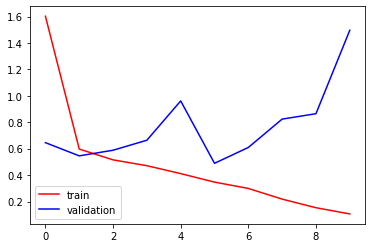

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

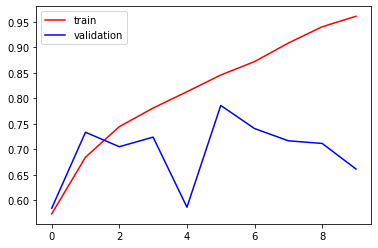

In [ ]:

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
#way to reduce overfitting

# add more data
# DAta Augmentation 
# l1/l2 REgularization
# Dropout
# Reduce Norm
# Batch Norm
# Reduce complexity

# New Section

In [ ]:
import cv2


In [ ]:
test_img = cv2.imread('/content/file1.jpg')

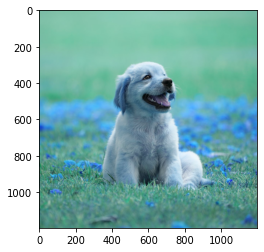

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1197, 1200, 3)

In [ ]:
test_img = cv2.resize(test_img, (256, 256))

In [ ]:
test_input = test_img.reshape((1, 256,256,3))

In [ ]:
res = model.predict(test_input)

1/1 [==============================] - 0s 256ms/step


In [ ]:
print(res)

[[0.]]


dog 2 test


In [ ]:
test_img1 = cv2.imread('/content/file2.jpg')

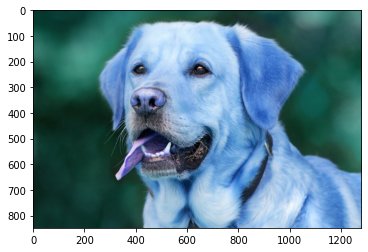

In [ ]:
plt.imshow(test_img1)


In [ ]:
test_img1= cv2.resize(test_img1, (256, 256))


In [ ]:
test_input1 = test_img1.reshape((1, 256,256,3))

In [ ]:
res1 = model.predict(test_input1)

1/1 [==============================] - 0s 46ms/step


In [ ]:
print(res1)

[[1.]]


Cat 


In [ ]:
test_img3 = cv2.imread('/content/file3.jpeg')

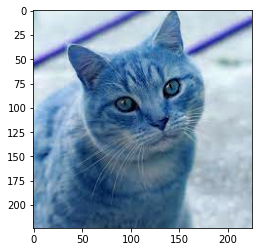

In [ ]:
plt.imshow(test_img3)

In [ ]:
test_img3= cv2.resize(test_img3, (256, 256))

In [ ]:
test_input3 = test_img3.reshape((1, 256,256,3))

In [ ]:
res3 = model.predict(test_input3)
print(res3)

1/1 [==============================] - 0s 19ms/step
[[0.]]


In [ ]:
def predict(val):
  if val[0][0] == 0:
    print('cat')
  elif val[0][0] ==1:
    print("dog")

predict(res)

predict(res1)

predict(res3)

cat
dog
cat
